In [1]:
# mglearn.plot.plot_scaling
# subplot2grid 참조 : https://wikidocs.net/4765

%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
#plt.rcParams['axes.xmargin'] = 0.05
#plt.rcParams['axes.ymargin'] = 0.05

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler)
from mglearn.plot_helpers import cm2


def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
  
    
   # print("X는 {}".format(X))


    
    X+=3
    
    
    #print("X+=3는 {}".format(X))
    
    
    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60, edgecolors='black')
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("원본 데이터")
    other_axes = [plt.subplot2grid((2, 4), (i, j))
                  for j in range(2, 4) for i in range(2)]

  
    #print("other_axse는 {}".format(other_axes))

    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60, edgecolors='black')
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        
        

CPython 3.6.5
IPython 6.4.0

sklearn 0.19.1
numpy 1.14.3
scipy 1.1.0
matplotlib 2.2.2


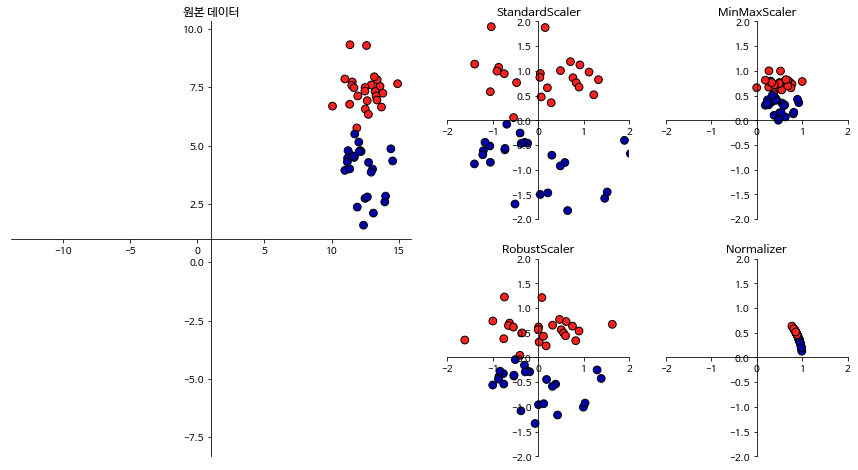

In [2]:
plot_scaling()

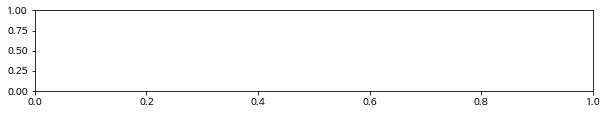

<Figure size 72x72 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 2))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
#bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

plt.show()

fig2 = plt.figure(figsize=(1,1))


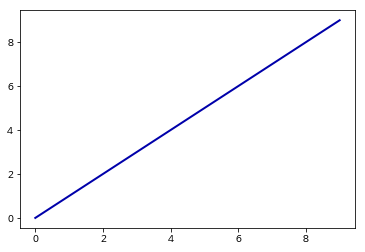

xs는 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
import matplotlib.pyplot as plt

xs = [x for x in range(10)]
ys = [y for y in range(10)]

plt.plot(xs, ys)
plt.show()

print("xs는 {}".format(xs))

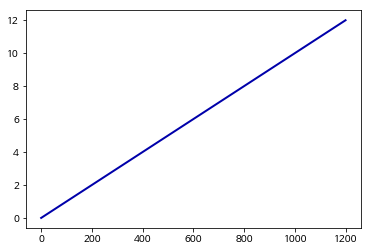

t는 [ 0.    0.01  0.02 ... 11.97 11.98 11.99]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np

t = np.arange(0, 12, 0.01)

plt.figure
plt.plot(t)
plt.show()

print("t는 {}".format(t))

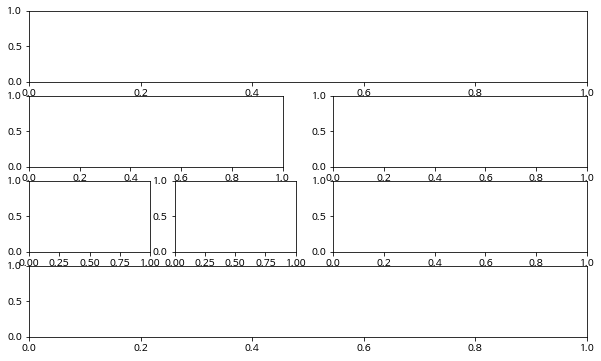

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(449)
plt.subplot(4,4,10)
plt.subplot(426)
plt.subplot(414)


plt.show()


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

print(cancer.keys())
print(cancer['data'].shape)
print(cancer['data'][:5])
print(cancer['target'])

print(cancer['DESCR'] + "\n...")

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
(569, 30)
[[  17.99    10.38   122.8   1001.       0.118    0.278    0.3      0.147
     0.242    0.079    1.095    0.905    8.589  153.4      0.006    0.049
     0.054    0.016    0.03     0.006   25.38    17.33   184.6   2019.
     0.162    0.666    0.712    0.265    0.46     0.119]
 [  20.57    17.77   132.9   1326.       0.085    0.079    0.087    0.07
     0.181    0.057    0.543    0.734    3.398   74.08     0.005    0.013
     0.019    0.013    0.014    0.004   24.99    23.41   158.8   1956.
     0.124    0.187    0.242    0.186    0.275    0.089]
 [  19.69    21.25   130.    1203.       0.11     0.16     0.197    0.128
     0.207    0.06     0.746    0.787    4.585   94.03     0.006    0.04
     0.038    0.021    0.022    0.005   23.57    25.53   152.5   1709.
     0.144    0.424    0.45     0.243    0.361    0.088]
 [  11.42    20.38    77.58   386.1      0.142    0.284    0.241    0.105
     0.26     0.09

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


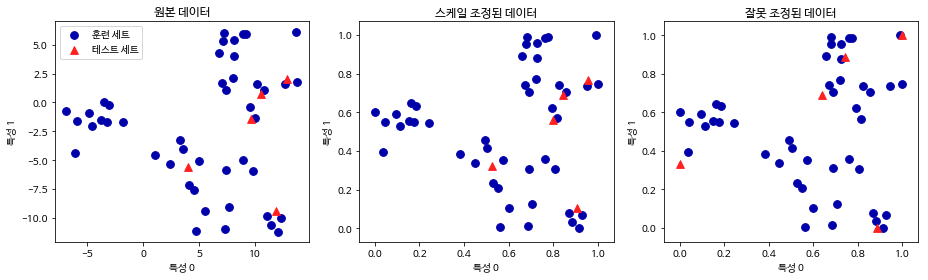

In [10]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [11]:
### 3.4 PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals.joblib import Memory

memory = Memory(cachedir="cache")


def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("원본 데이터")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("특성 1")
    axes[0].set_ylabel("특성 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.2, -.3, "성분 2", size=14)
    axes[0].text(-3, -3.5, "성분 1", size=14)
    axes[0].set_aspect('equal')
    axes[0].set_xlim(-8, 4)
    axes[0].set_ylim(-8, 4)

    axes[1].set_title("변환된 데이터")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("첫번째 주성분")
    axes[1].set_ylabel("두번째 주성분")
    axes[1].set_aspect('equal')
    axes[1].set_xlim(-8, 8)
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("두번째 주성분을 제거한 변환된 데이터")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("첫번째 주성분")
    axes[2].set_aspect('equal')
    axes[2].set_xlim(-8, 8)
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("첫번째 주성분만 사용하여 회전 복원")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("특성 1")
    axes[3].set_ylabel("특성 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)


def plot_pca_whitening():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA(whiten=True)
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("원본 데이터")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("특성 1")
    axes[0].set_ylabel("특성 2")
    axes[0].set_aspect('equal')

    axes[1].set_title("화이트닝된 데이터")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[1].set_xlabel("첫번째 주성분")
    axes[1].set_ylabel("두번째 주성분")
    axes[1].set_aspect('equal')
    axes[1].set_xlim(-3, 4)


@memory.cache
def pca_faces(X_train, X_test):
    # copy and pasted from nmf. refactor?
    # Build NMF models with 10, 50, 100, 500 components
    # this list will hold the back-transformd test-data
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        # build the NMF model
        pca = PCA(n_components=n_components)
        pca.fit(X_train)
        # transform the test data (afterwards has n_components many dimensions)
        X_test_pca = pca.transform(X_test)
        # back-transform the transformed test-data
        # (afterwards it's in the original space again)
        X_test_back = pca.inverse_transform(X_test_pca)
        reduced_images.append(X_test_back)
    return reduced_images


def plot_pca_faces(X_train, X_test, image_shape):
    reduced_images = pca_faces(X_train, X_test)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        ax[0].imshow(X_test[i].reshape(image_shape),
                     vmin=0, vmax=1)
        # plot the four back-transformed images
        for a, X_test_back in zip(ax[1:], reduced_images):
            a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)

    # label the top row
    axes[0, 0].set_title("원본 이미지")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500, 2000]):
        ax.set_title("성분 %d개" % n_components)


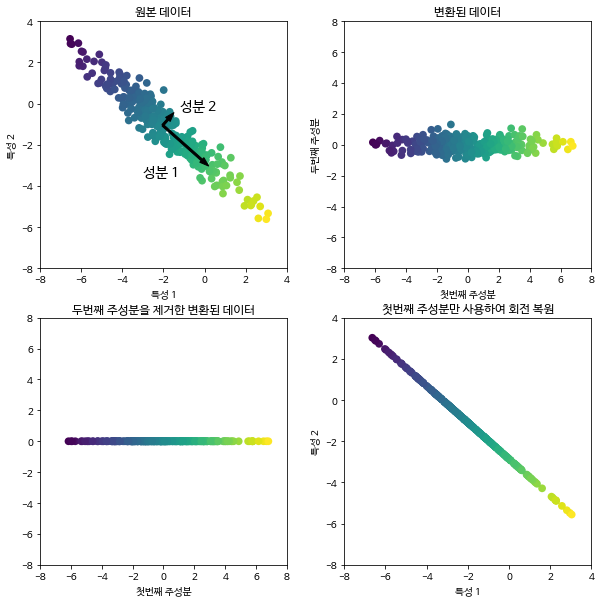

In [12]:
plot_pca_illustration()

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)
PCA 주성분 형태  (2, 30)
PCA 주성분 [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


([<matplotlib.axis.XTick at 0x7efe8dbff320>,
 <a list of 30 Text xticklabel objects>)

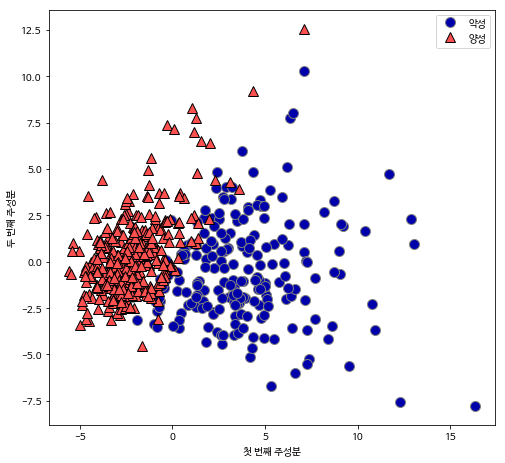

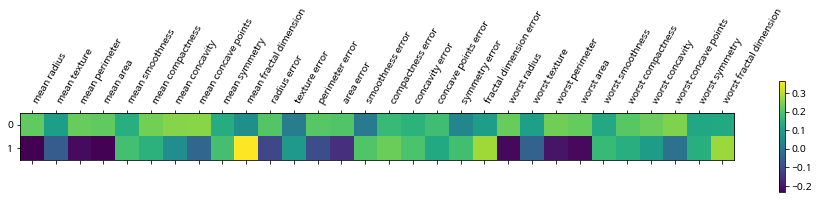

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

print


# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

print("PCA 주성분 형태  {}".format(pca.components_.shape))
print("PCA 주성분 {}".format(pca.components_))


plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

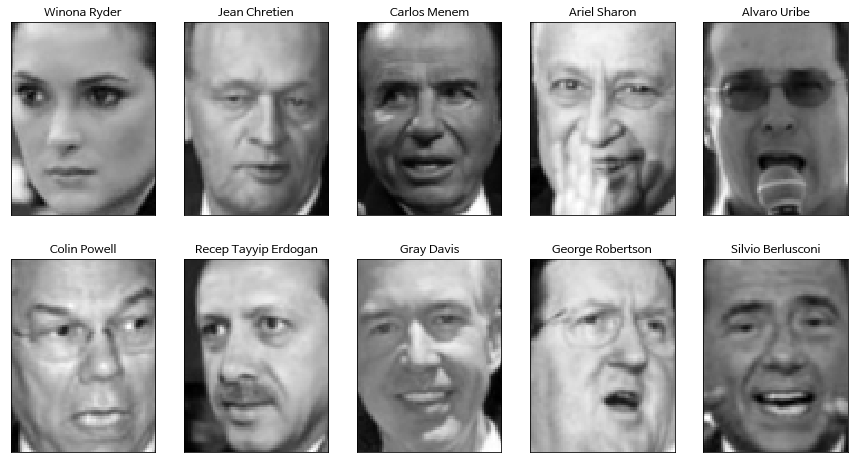

In [14]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

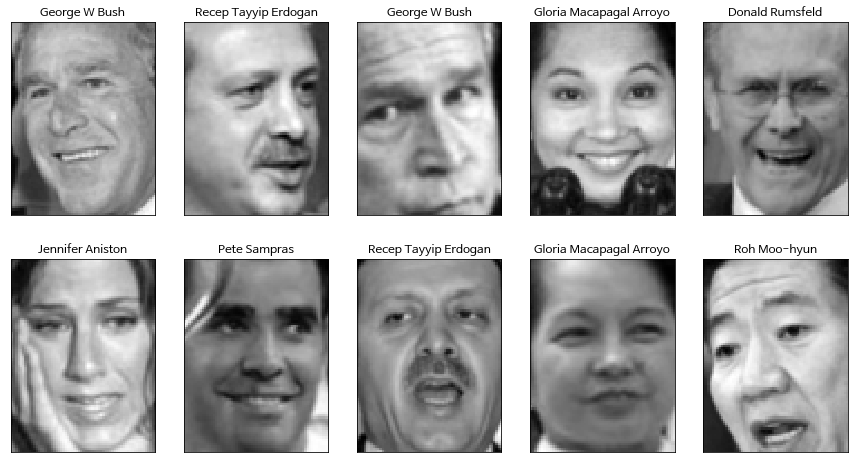

In [15]:
people2 = fetch_lfw_people(min_faces_per_person=21, resize=0.7)
image_shape = people2.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people2.target, people2.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people2.target_names[target])

In [16]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format((len(people.target_names))))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [17]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [18]:
print("people key: {}".format(people.keys()))
print(people['DESCR'])
print(people)
type(people)
      
    

people key: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
LFW faces dataset
{'data': array([[ 57.   ,  60.333,  78.   , ...,  17.333,  16.667,  22.667],
       [ 66.667,  80.667,  88.667, ...,   8.667,   8.333,   9.333],
       [ 18.667,  14.333,  15.   , ...,  22.667,  22.667,  25.667],
       ...,
       [ 77.333,  90.333,  93.333, ..., 233.667, 234.333, 230.667],
       [ 87.667,  71.667,  63.333, ...,  96.   ,  92.333,  96.333],
       [ 91.   ,  90.667,  94.667, ...,  40.333,  42.333,  42.333]],
      dtype=float32), 'images': array([[[ 57.   ,  60.333,  78.   , ...,  40.667,  36.667,  34.   ],
        [ 52.667,  60.   ,  92.   , ...,  46.667,  36.   ,  30.   ],
        [ 46.   ,  66.   , 113.333, ...,  51.   ,  43.333,  37.667],
        ...,
        [ 61.   ,  62.667,  62.333, ...,  19.   ,  18.333,  18.667],
        [ 62.667,  64.667,  67.   , ...,  17.333,  18.   ,  22.333],
        [ 65.333,  68.   ,  67.   , ...,  17.333,  16.667,  22.667]],

       [[ 66.6

sklearn.utils.Bunch

### 3.4.2 비음수 행렬 

In [19]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals.joblib import Memory

memory = Memory(cachedir="cache")


def plot_nmf_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    # Add 8 to make sure every point lies in the positive part of the space
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

    nmf = NMF(random_state=0, n_components=5)
    nmf.fit(X_blob)
    X_nmf = nmf.transform(X_blob)

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_xlim([0, 12])
    axes[0].set_ylim([0, 12])
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("특성 1")
    axes[0].set_ylabel("특성 2")
    axes[0].arrow(0, 0, nmf.components_[0, 0], nmf.components_[0, 1], width=.1,
                  head_width=.3, color='k')
    axes[0].arrow(0, 0, nmf.components_[1, 0], nmf.components_[1, 1], width=.1,
                  head_width=.3, color='k')
    axes[0].arrow(0, 0, nmf.components_[2, 0], nmf.components_[2, 1], width=.1,
                  head_width=.3, color='r')
    axes[0].arrow(0, 0, nmf.components_[3, 0], nmf.components_[3, 1], width=.1,
                  head_width=.3, color='b')
    axes[0].arrow(0, 0, nmf.components_[4, 0], nmf.components_[4, 1], width=.1,
                  head_width=.3, color='c')
    axes[0].set_aspect('equal')
    axes[0].set_title("성분이 2개인 NMF")

    # second plot
    nmf = NMF(random_state=0, n_components=1)
    nmf.fit(X_blob)

    axes[1].set_xlim([0, 12])
    axes[1].set_ylim([0, 12])
    axes[1].scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("특성 1")
    axes[1].set_ylabel("특성 2")
    axes[1].arrow(0, 0, nmf.components_[0, 0], nmf.components_[0, 1], width=.1,
                  head_width=.3, color='k')

    axes[1].set_aspect('equal')
    axes[1].set_title("성분이 1개인 NMF")


@memory.cache
def nmf_faces(X_train, X_test):
    # Build NMF models with 10, 50, 100 and 500 components
    # this list will hold the back-transformd test-data
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        # build the NMF model
        nmf = NMF(n_components=n_components, random_state=0)
        nmf.fit(X_train)
        # transform the test data (afterwards has n_components many dimensions)
        X_test_nmf = nmf.transform(X_test)
        # back-transform the transformed test-data
        # (afterwards it's in the original space again)
        X_test_back = np.dot(X_test_nmf, nmf.components_)
        reduced_images.append(X_test_back)
    return reduced_images


def plot_nmf_faces(X_train, X_test, image_shape):
    reduced_images = nmf_faces(X_train, X_test)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        ax[0].imshow(X_test[i].reshape(image_shape),
                     vmin=0, vmax=1)
        # plot the four back-transformed images
        for a, X_test_back in zip(ax[1:], reduced_images):
            a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)

    # label the top row
    axes[0, 0].set_title("원본 이미지")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("성분 %d개" % n_components)


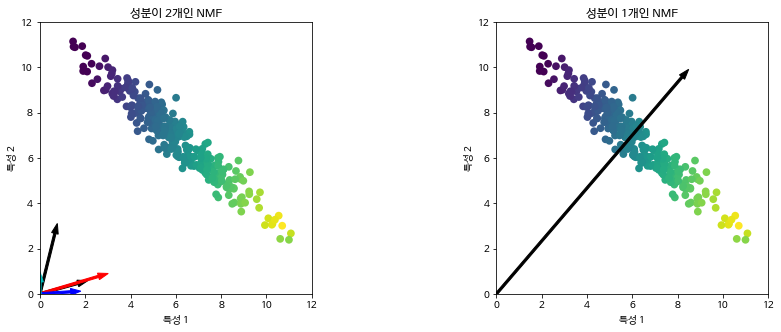

In [20]:
plot_nmf_illustration()

In [1]:
## 인위적인 데이터 생성 
## mglearn.plots.plot_nmf_illustration()

from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals.joblib import Memory

memory = Memory(cachedir="cache")


#numpy에서 정규분포를 갖는 임의의 arrary 리턴
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
    # Add 8 to make sure every point lies in the positive part of the space  --> 왜 8을 더하는지 잘 몰겠다. 정규분포의 성질인 것 같다. 
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

print("X_는 {}".format(X_))
print("중간값 는 {}".format(np.dot(X_, rnd.normal(size=(2, 2)))))
print(rnd.normal(size=2))

X_는 [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [-0.98060789 -0.85685315]
 [-0.87187918 -0.42250793]
 [ 0.99643983  0.71242127]
 [ 0.05914424 -0.36331088]
 [ 0.00328884 -0.10593044]
 [ 0.79305332 -0.63157163]
 [-0.00619491 -0.10106761]
 [-0.05230815  0.24921766]
 [ 0.19766009  1.33484857]
 [-0.08687561  1.56153229]
 [-0.30585302 -0.47773142]
 [ 0.10073819  0.35543847]
 [ 0.26961241  1.29196338]
 [ 1.13934298  0.4944404 ]
 [-0.33633626 -0.10061435]
 [ 1.41339802  0.22125412]
 [-1.31077313 -0.68956523]
 [-0.57751323  1.15220477]
 [-0.10716398  2.26010677]
 [ 0.65661947  0.12480683]
 [-0.43570392  0.97217931]
 [-0.24071114 -0.82412345]
 [ 0.56813272  0.01275832]
 [ 1.18906073 -0.07359332]
 [-2.85968797  0.7893664 ]
 [-1.87774088  1.53875615]
 [ 1.82136474 -0.4270313

In [3]:
## 인위적인 데이터 생성 
## mglearn.plots.plot_nmf_illustration()

from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals.joblib import Memory

memory = Memory(cachedir="cache")


#numpy에서 정규분포를 갖는 임의의 arrary 리턴
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
    # Add 8 to make sure every point lies in the positive part of the space  --> 왜 8을 더하는지 잘 몰겠다. 정규분포의 성질인 것 같다. 
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

print("X_는 {}".format(X_))
print("중간값 는 {}".format(np.dot(X_, rnd.normal(size=(2, 2)))))
print(rnd.normal(size=2))

X_는 [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [-0.98060789 -0.85685315]
 [-0.87187918 -0.42250793]
 [ 0.99643983  0.71242127]
 [ 0.05914424 -0.36331088]
 [ 0.00328884 -0.10593044]
 [ 0.79305332 -0.63157163]
 [-0.00619491 -0.10106761]
 [-0.05230815  0.24921766]
 [ 0.19766009  1.33484857]
 [-0.08687561  1.56153229]
 [-0.30585302 -0.47773142]
 [ 0.10073819  0.35543847]
 [ 0.26961241  1.29196338]
 [ 1.13934298  0.4944404 ]
 [-0.33633626 -0.10061435]
 [ 1.41339802  0.22125412]
 [-1.31077313 -0.68956523]
 [-0.57751323  1.15220477]
 [-0.10716398  2.26010677]
 [ 0.65661947  0.12480683]
 [-0.43570392  0.97217931]
 [-0.24071114 -0.82412345]
 [ 0.56813272  0.01275832]
 [ 1.18906073 -0.07359332]
 [-2.85968797  0.7893664 ]
 [-1.87774088  1.53875615]
 [ 1.82136474 -0.4270313

s는 [ 1.55527846e-01 -1.94129725e-01  4.18270797e-02 -7.08646605e-02
  1.03479564e-01 -3.73424273e-02  1.25896251e-01 -9.17586304e-02
 -1.15204013e-01  9.12781769e-02  1.39564340e-02 -4.82957999e-02
 -8.84545494e-02  1.12013631e-01 -3.65480950e-02 -9.42104880e-02
  8.65832408e-02 -5.96216103e-02 -1.13188747e-01 -3.70606931e-02
 -6.18202347e-02  4.78330816e-03 -7.28026992e-02  3.34538688e-03
  1.93821021e-02  4.02977981e-02 -6.03731339e-02  1.19252045e-01
  3.98471081e-02 -3.09510681e-02  6.01979811e-02  4.42558934e-02
  4.31591458e-02  1.04808535e-01 -1.02492627e-01  7.04820647e-02
 -1.36541864e-01 -7.28160262e-02 -7.96589906e-02 -3.86810197e-02
 -8.51350867e-02 -5.17766219e-02 -1.10641456e-01 -1.73425535e-02
 -9.85895254e-03  4.62156441e-02  7.42677793e-02 -5.59542382e-02
  3.11028960e-02 -6.56867903e-02  2.26835343e-01  1.97297245e-01
  7.21727385e-02  2.09108118e-02  1.03082723e-01 -4.31921159e-02
  1.54198418e-01  7.46850787e-02  1.11047657e-01  7.03230977e-03
 -1.00995157e-01 -2.28

/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


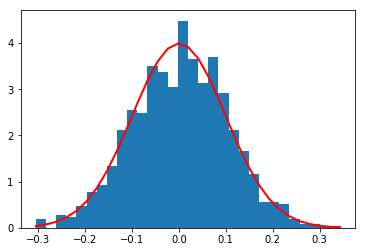

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
# np.random.nomral 함수를 이용해서 평균 0, 표준편차 0.1인 sample들을 1000개 추출한다.
s = np.random.normal(mu, sigma, 1000)

print("s는 {}".format(s))
# sample들의 historgram을 출력한다.
count, bins, ignored = plt.hist(s, 30, normed=True)
# sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

S shape (2000, 3)


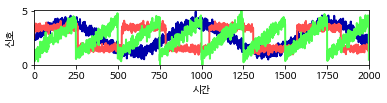

In [25]:
import numpy as np
import pandas as pd
import os
from scipy import signal
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures






def make_signals():
    # fix a random state seed
    rng = np.random.RandomState(42)
    n_samples = 2000
    time = np.linspace(0, 8, n_samples)
    # create three signals
    s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
    s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
    s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

    # concatenate the signals, add noise
    S = np.c_[s1, s2, s3]
    S += 0.2 * rng.normal(size=S.shape)

    S /= S.std(axis=0)  # Standardize data
    S -= S.min()
    return S

#S = mglearn.datasets.make_signals()

S = make_signals()


plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

print("S shape {}".format(S.shape))

In [43]:
#

from sklearn.datasets import load_digits
digits = load_digits()

print(digits.keys())
print(digits['DESCR'])
print(digits['data'].shape)
print(digits['target'])
print("digits['data'] = {}".format(digits['data']))

'''
fig, axes = plt.subplots(3, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
'''

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

"\nfig, axes = plt.subplots(3, 5, figsize=(10, 5),\n                         subplot_kw={'xticks':(), 'yticks': ()})\nfor ax, img in zip(axes.ravel(), digits.images):\n    ax.imshow(img)\n"